In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sm.datasets.fair.load_pandas().data

In [3]:
# The dataset originates from:
# Fair, R. (1978). “A Theory of Extramarital Affairs” Journal of Political Economy
# on married women

# What social, economic, and emotional constraints shape female infidelity in the 1970s?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [5]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [6]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


### Key variables (important to understand semantically)
### Column	Meaning

#### rate_marriage	1–5 (very unhappy → very happy)

#### age	Age

#### years_married	Length of marriage

#### children	0-5

#### religious	1–4 (very non-religious → very religious)

#### education	Years of schooling

#### occupation	Occupational rank

#### occupation_husb	Husband’s occupation

#### affairs	Number of extramarital affairs (past year)

In [7]:
# sociological sanity checks

# Distribution of affairs
df["affairs"].describe()

count    6366.000000
mean        0.705374
std         2.203374
min         0.000000
25%         0.000000
50%         0.000000
75%         0.484848
max        57.599991
Name: affairs, dtype: float64

In [8]:
# % who had at least one affair
(df["affairs"] > 0).mean()

0.3224945020420987

In [9]:
# This is classic hidden behavior data.

In [10]:
(df["affairs"] == 0).mean()

0.6775054979579014

In [11]:
df["had_affair"] = (df["affairs"] > 0).astype(int)

In [12]:
df["had_affair"].value_counts(normalize=True)

had_affair
0    0.677505
1    0.322495
Name: proportion, dtype: float64

In [13]:
# Marriage satisfaction (rate_marriage)

In [14]:
df["rate_marriage"].value_counts().sort_index()

rate_marriage
1.0      99
2.0     348
3.0     993
4.0    2242
5.0    2684
Name: count, dtype: int64

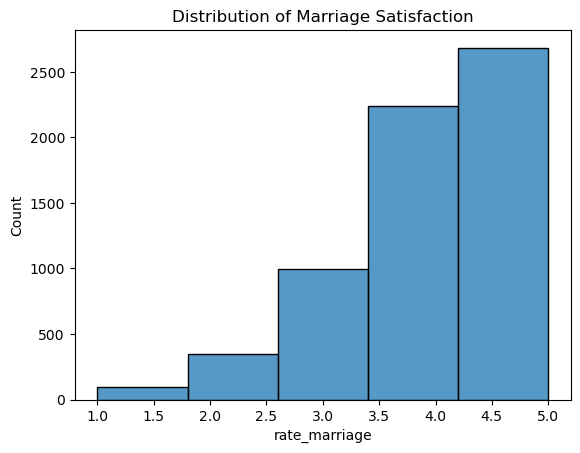

In [15]:
sns.histplot(df["rate_marriage"], bins=5)
plt.title("Distribution of Marriage Satisfaction")
plt.show()

In [16]:
# Religion (religious)

In [17]:
df["religious"].value_counts().sort_index()

religious
1.0    1021
2.0    2267
3.0    2422
4.0     656
Name: count, dtype: int64

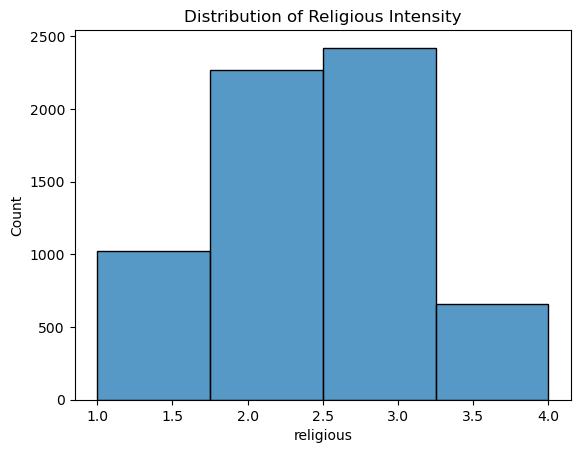

In [18]:
sns.histplot(df["religious"], bins=4)
plt.title("Distribution of Religious Intensity")
plt.show()

In [19]:
# Children

In [20]:
df["children"].value_counts().sort_index()

children
0.0    2414
1.0    1159
2.0    1481
3.0     781
4.0     328
5.5     203
Name: count, dtype: int64

In [21]:
# Age & years married

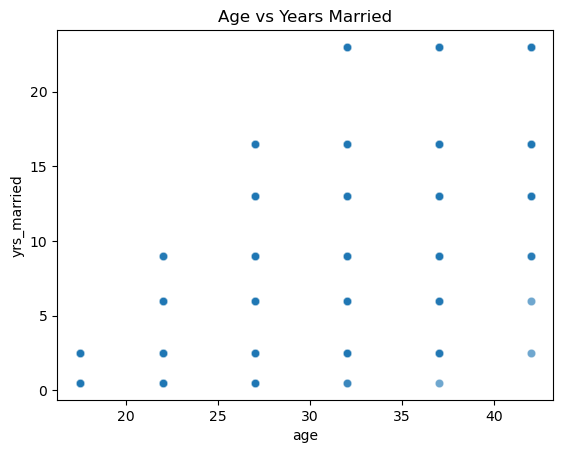

In [22]:
sns.scatterplot(
    data=df,
    x="age",
    y="yrs_married",
    alpha=0.4
)
plt.title("Age vs Years Married")
plt.show()

In [23]:
# Marriage satisfaction × affairs (MOST IMPORTANT)

In [24]:
df.groupby("rate_marriage")["had_affair"].mean()

rate_marriage
1.0    0.747475
2.0    0.635057
3.0    0.550856
4.0    0.322926
5.0    0.181446
Name: had_affair, dtype: float64

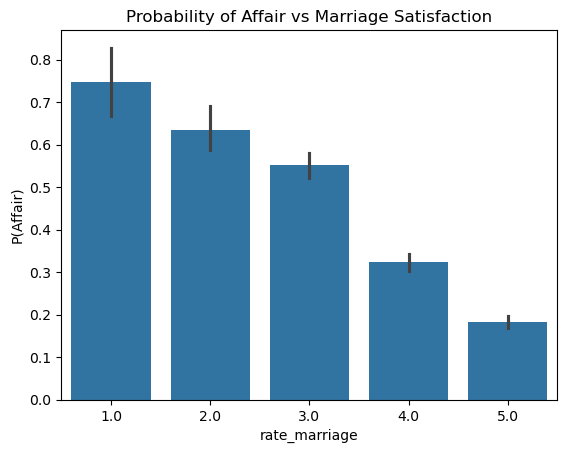

In [25]:
sns.barplot(
    data=df,
    x="rate_marriage",
    y="had_affair"
)
plt.ylabel("P(Affair)")
plt.title("Probability of Affair vs Marriage Satisfaction")
plt.show()

In [26]:
# Emotional dissatisfaction dominates behavior

In [27]:
# Religion × affairs

In [28]:
df.groupby("religious")["had_affair"].mean()

religious
1.0    0.399608
2.0    0.361270
3.0    0.291908
4.0    0.181402
Name: had_affair, dtype: float64

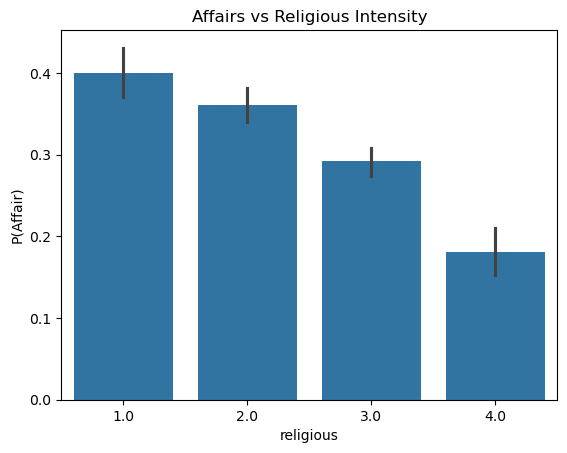

In [29]:
sns.barplot(
    data=df,
    x="religious",
    y="had_affair"
)
plt.ylabel("P(Affair)")
plt.title("Affairs vs Religious Intensity")
plt.show()

In [30]:
# Religion constrains behavior, but does not eliminate it

In [31]:
# Children × affairs

In [32]:
df.groupby("children")["had_affair"].mean()

children
0.0    0.207954
1.0    0.355479
2.0    0.410533
3.0    0.411012
4.0    0.399390
5.5    0.389163
Name: had_affair, dtype: float64

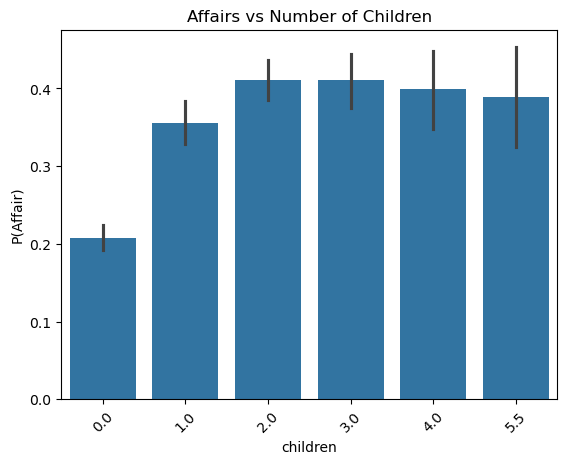

In [33]:
sns.barplot(
    data=df,
    x="children",
    y="had_affair"
)
plt.xticks(rotation=45)
plt.ylabel("P(Affair)")
plt.title("Affairs vs Number of Children")
plt.show()

In [34]:
# Structural constraint, weaker than norms or satisfaction

In [35]:
# Economic independence (occupation)

In [36]:
df.groupby("occupation")["had_affair"].mean()

occupation
1.0    0.170732
2.0    0.293364
3.0    0.346748
4.0    0.261723
5.0    0.417568
6.0    0.366972
Name: had_affair, dtype: float64

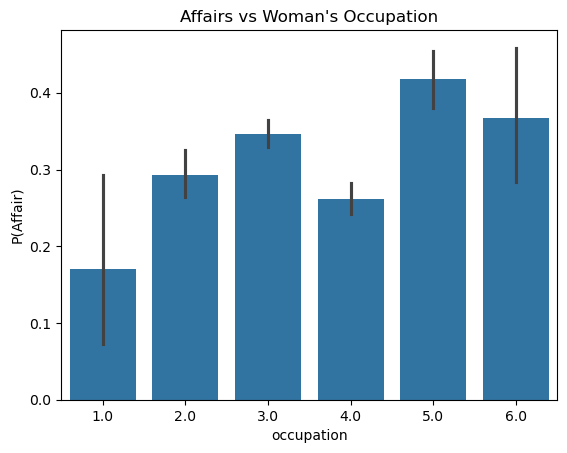

In [37]:
sns.barplot(
    data=df,
    x="occupation",
    y="had_affair"
)
plt.ylabel("P(Affair)")
plt.title("Affairs vs Woman's Occupation")
plt.show()

In [38]:
# Higher occupation → higher autonomy → higher probability

In [39]:
# Husband’s occupation (power asymmetry)

In [40]:
df.groupby("occupation_husb")["had_affair"].mean()

occupation_husb
1.0    0.209607
2.0    0.325688
3.0    0.353061
4.0    0.314778
5.0    0.338392
6.0    0.311321
Name: had_affair, dtype: float64

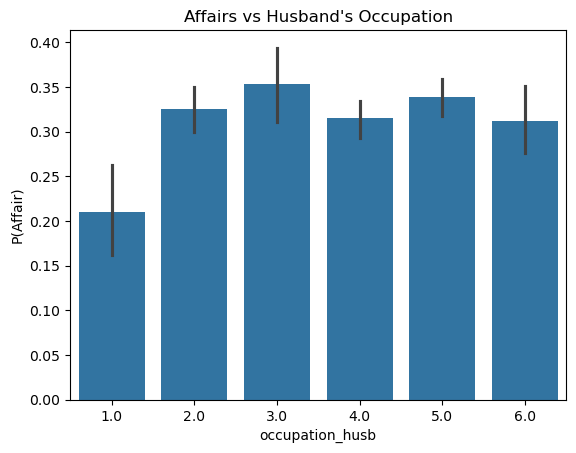

In [41]:
sns.barplot(
    data=df,
    x="occupation_husb",
    y="had_affair"
)
plt.ylabel("P(Affair)")
plt.title("Affairs vs Husband's Occupation")
plt.show()

In [42]:
# Marriage satisfaction × religion

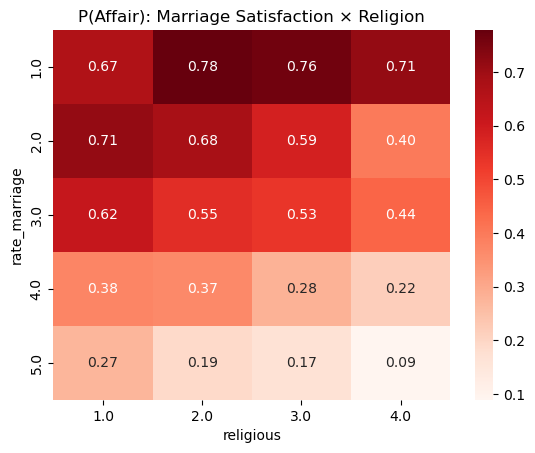

In [43]:
pivot = df.pivot_table(
    index="rate_marriage",
    columns="religious",
    values="had_affair",
    aggfunc="mean"
)

sns.heatmap(pivot, annot=True, fmt=".2f", cmap="Reds")
plt.title("P(Affair): Marriage Satisfaction × Religion")
plt.show()

In [44]:
# Low satisfaction overwhelms religious constraint

In [45]:
# Children × marriage satisfaction

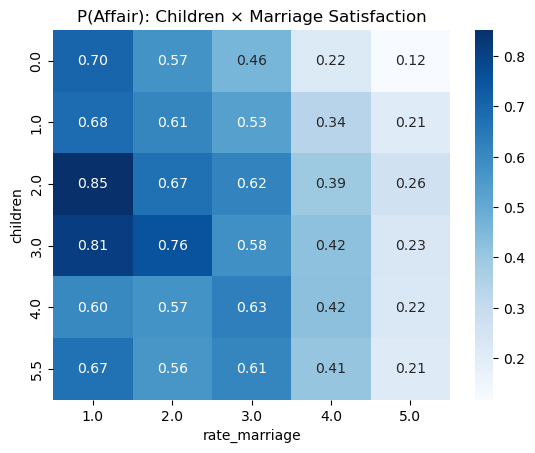

In [46]:
pivot = df.pivot_table(
    index="children",
    columns="rate_marriage",
    values="had_affair",
    aggfunc="mean"
)

sns.heatmap(pivot, annot=True, fmt=".2f", cmap="Blues")
plt.title("P(Affair): Children × Marriage Satisfaction")
plt.show()

In [47]:
# Age by affair status

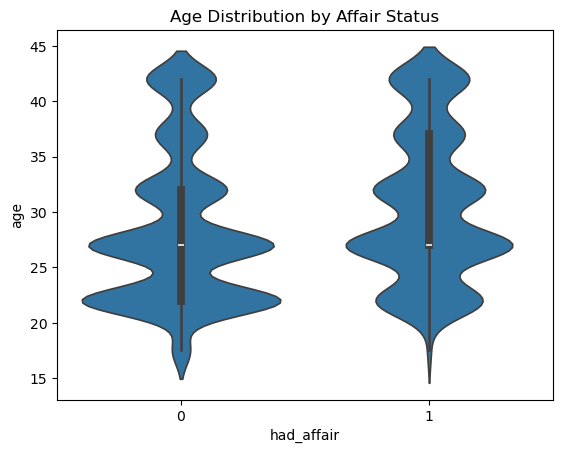

In [48]:
sns.violinplot(
    data=df,
    x="had_affair",
    y="age"
)
plt.title("Age Distribution by Affair Status")
plt.show()

In [49]:
# Years married by affair status

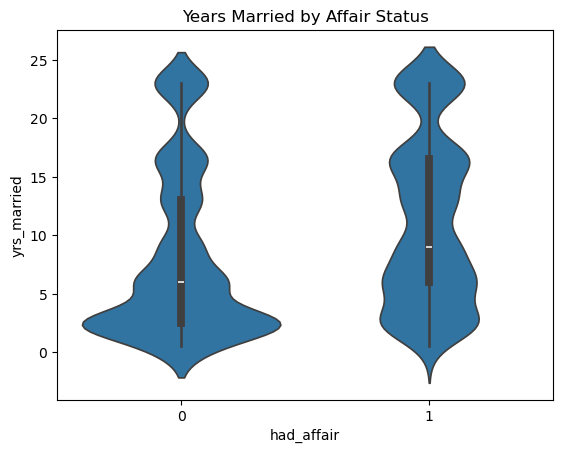

In [50]:
sns.violinplot(
    data=df,
    x="had_affair",
    y="yrs_married"
)
plt.title("Years Married by Affair Status")
plt.show()

In [51]:
# Age matters weakly; relationship quality matters strongly.

Extramarital affairs among married women in the 1970s were primarily associated with subjective marital dissatisfaction, weakly constrained by religion and children, and facilitated by greater economic independence. Age and education played minor roles once norms and satisfaction were accounted for.